# Capstone Project 
### Applied Data Science Capstone by IBM/Coursera

### Introduction

In this project I will try to predict where to open a new resturantt in the city of Toronto. I will base by decision according to the presence of other resturants, attractions and other features. I will cluster each neighborhood to help the analysis. At the end I will try to find some way to predict the best position assiging some score to the different features of each neighborhood

### Description of DATABASE

The projecrt involves taking the information on the wikipedia [page](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). The information is transofrmed in a pandas dataframe. This dataframe is then merged with the location poisiton of each neighbothood using the information contained in [cock](https://cocl.us/Geospatial_data). The two DB are then merged togheter using the postal code index.
Foursquare is then used to extrapolate the data of the neighbothood

### Methodology

* I will use Beatuiful soup to retrive data from Wikipedia page
* I will create Pandas DF
* I will take the location coordinate su using cocl
* I will merge the two DB
* I will obtain the venues information using Forsquare
* I will cluster the neighboard
* I will try to find the best position where to build the new resturant
* I will conclude with a Result sections

### Preparing the DB

In [70]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from bs4 import BeautifulSoup
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r=requests.get(url)
html=r.text
soup = BeautifulSoup(html, 'html5lib')
table_contents=[]
table=soup.find('table')


In [5]:
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [6]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})


In [7]:

df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [8]:
df.shape

(103, 3)

In [9]:
locgeo_df = pd.read_csv('https://cocl.us/Geospatial_data', index_col='Postal Code')
toronto_data = df.join(locgeo_df, on='Postal Code')
toronto_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


EXPLORE NEIGBOORDS NOW

In [10]:
address = 'Toronto'

geolocator = Nominatim(user_agent="TR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of TR City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of TR City are 43.6534817, -79.3839347.


Table to groupe with a Radius 300

In [11]:
# create map of Toronro using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [12]:
CLIENT_ID = '5F3KZ2IFOMFJO0OOBZIXODH3MYO5YN3YIGOYHQGDKNTKF3XH' # your Foursquare ID
CLIENT_SECRET = 'JNTE4XBXBZO0VMJJDRBSQYRWBOR43QR5PWR50PY0OMVUXRT1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

Your credentails:
CLIENT_ID: 5F3KZ2IFOMFJO0OOBZIXODH3MYO5YN3YIGOYHQGDKNTKF3XH
CLIENT_SECRET:JNTE4XBXBZO0VMJJDRBSQYRWBOR43QR5PWR50PY0OMVUXRT1


'https://api.foursquare.com/v2/venues/explore?&client_id=5F3KZ2IFOMFJO0OOBZIXODH3MYO5YN3YIGOYHQGDKNTKF3XH&client_secret=JNTE4XBXBZO0VMJJDRBSQYRWBOR43QR5PWR50PY0OMVUXRT1&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [14]:
results = requests.get(url).json()
results.head()

AttributeError: 'dict' object has no attribute 'head'

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-16-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

# This is the final dataset I will use to do my data analysis

In [20]:
print(toronto_venues.shape)
toronto_venues.head()

(2106, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [34]:
print('There are {} uniques Neighborhood.'.format(len(toronto_venues['Neighborhood'].unique())))
print('There are {} uniques Venue Category.'.format(len(toronto_venues['Venue Category'].unique())))

There are 100 uniques Neighborhood.
There are 272 uniques Venue Category.


In [21]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped


num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))


----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1                     Lounge   0.2
2             Breakfast Spot   0.2
3             Clothing Store   0.2
4               Skating Rink   0.2
----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.22
1          Pool  0.11
2           Pub  0.11
3   Coffee Shop  0.11
4  Skating Rink  0.11
----Bathurst Manor, Wilson Heights, Downsview North----
              venue  freq
0              Bank  0.10
1       Coffee Shop  0.10
2       Gas Station  0.05
3  Sushi Restaurant  0.05
4       Supermarket  0.05
----Bayview Village----
                 venue  freq
0                 Café  0.25
1   Chinese Restaurant  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4        Metro Station  0.00
----Bedford Park, Lawrence Manor East----
                     venue  freq
0              Coffee Shop  0.08
1               Restaurant  0.08
2           Sandwich Place  0.08
3       Italian Restauran

                  venue  freq
0        Massage Studio  0.17
1         Metro Station  0.17
2  Caribbean Restaurant  0.17
3           Coffee Shop  0.17
4    Miscellaneous Shop  0.17
----Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East----
                        venue  freq
0                        Pool  0.33
1  Construction & Landscaping  0.33
2              Baseball Field  0.33
3                 Yoga Studio  0.00
4          Miscellaneous Shop  0.00
----Ontario Provincial Government----
              venue  freq
0       Coffee Shop  0.20
1  Sushi Restaurant  0.07
2       Yoga Studio  0.03
3    Sandwich Place  0.03
4          Beer Bar  0.03
----Parkdale, Roncesvalles----
            venue  freq
0  Breakfast Spot  0.13
1       Gift Shop  0.13
2     Coffee Shop  0.07
3         Dog Run  0.07
4   Movie Theater  0.07
----Parkview Hill, Woodbine Gardens----
                venue  freq
0         Pizza Place  0

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Here there are the first 5 most common venues for each NB 

In [347]:
num_top_venues = 27

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{}_Venue'.format(ind+1))
    except:
        columns.append('Venue_{}'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,Venue_1,Venue_2,Venue_3,Venue_4,Venue_5,Venue_6,Venue_7,Venue_8,Venue_9,Venue_10,Venue_11,Venue_12,Venue_13,Venue_14,Venue_15,Venue_16,Venue_17,Venue_18,Venue_19,Venue_20,Venue_21,Venue_22,Venue_23,Venue_24,Venue_25,Venue_26,Venue_27
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Clothing Store,Breakfast Spot,Donut Shop,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Dumpling Restaurant,Drugstore,Dim Sum Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Diner,Dessert Shop,Event Space,Department Store,Deli / Bodega,Dance Studio,Curling Ice,Cupcake Shop,Cuban Restaurant,Creperie
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Skating Rink,Pharmacy,Pool,Pub,Sandwich Place,Gym,Airport Service,Event Space,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Dive Bar,Distribution Center,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop,Department Store,Deli / Bodega,Dance Studio
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pharmacy,Fried Chicken Joint,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Restaurant,Supermarket,Sushi Restaurant,Middle Eastern Restaurant,Ice Cream Shop,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Gas Station,Pizza Place,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dog Run,Comfort Food Restaurant,Dive Bar,Distribution Center,Comic Shop
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Women's Store,Diner,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Discount Store,Dessert Shop,Dim Sum Restaurant,Falafel Restaurant,Department Store,Deli / Bodega,Dance Studio,Curling Ice,Cupcake Shop,Cuban Restaurant
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pub,Cosmetics Shop,Juice Bar,Fast Food Restaurant,Indian Restaurant,Butcher,Café,Sushi Restaurant,Cupcake Shop,Thai Restaurant,Liquor Store,Toy / Game Store,Greek Restaurant,Grocery Store,American Restaurant,Pharmacy,Pizza Place,Comfort Food Restaurant,Coworking Space,Comic Shop,Donut Shop,Doner Restaurant,Dog Run


In [314]:
neighborhoods_venues_sorted

,Neighborhood,Venue_1,Venue_2,Venue_3,Venue_4,Venue_5
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Clothing Store,Breakfast Spot
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Skating Rink,Pharmacy,Pool
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pharmacy,Fried Chicken Joint,Shopping Mall
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Women's Store
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pub
5,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Restaurant,Farmers Market
6,"Birch Cliff, Cliffside West",College Stadium,Café,Skating Rink,General Entertainment,Dog Run
7,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Climbing Gym,Burrito Place
8,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Terminal,Airport Lounge,Airport Service,Harbor / Marina,Plane
9,Caledonia-Fairbanks,Park,Women's Store,Bar,Donut Shop,Discount Store


In [348]:
max_neg=neighborhoods_venues_sorted['Venue_2'].value_counts()
max_neg

Coffee Shop                   9
Women's Store                 7
Café                          5
Park                          4
Grocery Store                 4
Mexican Restaurant            3
Bank                          3
Sandwich Place                3
Bakery                        3
Convenience Store             3
American Restaurant           2
Playground                    2
Cocktail Bar                  2
Japanese Restaurant           2
Beer Store                    2
Trail                         2
Gym / Fitness Center          2
Intersection                  2
Fast Food Restaurant          2
Bus Line                      2
Gym                           2
Hotel                         2
Massage Studio                2
Restaurant                    2
Furniture / Home Store        2
Sushi Restaurant              1
Garden Center                 1
Breakfast Spot                1
Indian Restaurant             1
Airport                       1
Korean BBQ Restaurant         1
Clothing

In [349]:
max_neg=neighborhoods_venues_sorted['Venue_5'].value_counts()
max_neg

Diner                        7
Discount Store               6
Japanese Restaurant          5
Women's Store                5
Distribution Center          4
Bank                         3
Italian Restaurant           3
Dog Run                      3
Donut Shop                   2
Dim Sum Restaurant           2
Vietnamese Restaurant        2
Dive Bar                     2
Park                         2
Restaurant                   2
Bakery                       2
Fast Food Restaurant         2
Doner Restaurant             2
Café                         2
Ice Cream Shop               2
Gym                          2
Dessert Shop                 2
Breakfast Spot               2
Pool                         1
Burrito Place                1
Skating Rink                 1
Sushi Restaurant             1
Burger Joint                 1
Farmers Market               1
Electronics Store            1
Middle Eastern Restaurant    1
Hobby Shop                   1
Mexican Restaurant           1
Light Ra

In [350]:
i=1
q=0
z=[]
for j in range(1,6):  
    print(neighborhoods_venues_sorted.iloc[i,j])
    if neighborhoods_venues_sorted.iloc[i,j]=="Coffee Shop" or neighborhoods_venues_sorted.iloc[i,j]=="Pizza Place" or neighborhoods_venues_sorted.iloc[i,j]=="Sandwich Place" or neighborhoods_venues_sorted.iloc[i,j]=="Fast Food Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Greek Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Thai Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Chinese Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Sushi Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Ramen Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Indian Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Hakka Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Turkish Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Mexican Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="American Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Japanese Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Korean BBQ Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Italian Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Latin American Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Asian Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Caribbean Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Seafood Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Vietnamese Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Vegetarian / Vegan Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Food Truck" or neighborhoods_venues_sorted.iloc[i,j]=="Gastropub" or neighborhoods_venues_sorted.iloc[i,j]=="Middle Eastern Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Doner Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Burrito Place" or neighborhoods_venues_sorted.iloc[i,j]=="Mediterranean Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Portuguese Restaurant":
        q=q+1
z.append(q)
print(q)
print(z)

Pizza Place
Coffee Shop
Skating Rink
Pharmacy
Pool
2
[2]


In [351]:
len(neighborhoods_venues_sorted)

100

create a score indicating hown many resturant or similar are in the NB

In [355]:
i=1
q=0
score=[]
for i in range(0,len(neighborhoods_venues_sorted)):
    q=0
    for j in range(0,27):  
        #print(neighborhoods_venues_sorted.iloc[i,j])
        if neighborhoods_venues_sorted.iloc[i,j]=="Coffee Shop" or neighborhoods_venues_sorted.iloc[i,j]=="Pizza Place" or neighborhoods_venues_sorted.iloc[i,j]=="Sandwich Place" or neighborhoods_venues_sorted.iloc[i,j]=="Fast Food Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Greek Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Thai Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Chinese Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Sushi Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Ramen Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Indian Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Hakka Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Turkish Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Mexican Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="American Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Japanese Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Korean BBQ Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Italian Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Latin American Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Asian Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Caribbean Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Seafood Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Vietnamese Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Vegetarian / Vegan Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Food Truck" or neighborhoods_venues_sorted.iloc[i,j]=="Gastropub" or neighborhoods_venues_sorted.iloc[i,j]=="Middle Eastern Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Doner Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Burrito Place" or neighborhoods_venues_sorted.iloc[i,j]=="Mediterranean Restaurant" or neighborhoods_venues_sorted.iloc[i,j]=="Portuguese Restaurant":
            q=q+1
    score.append(q)
  
print(z)

[2, 4, 8, 3, 12, 6, 1, 5, 2, 1, 4, 9, 5, 10, 1, 6, 2, 10, 12, 3, 3, 3, 7, 4, 2, 1, 2, 1, 2, 7, 5, 6, 3, 6, 14, 3, 8, 4, 1, 3, 7, 6, 3, 1, 1, 1, 7, 3, 7, 2, 3, 1, 5, 8, 2, 1, 3, 1, 7, 1, 7, 3, 1, 9, 4, 3, 1, 2, 9, 1, 2, 1, 9, 2, 1, 4, 7, 9, 6, 8, 7, 5, 2, 2, 9, 1, 7, 10, 7, 4, 1, 6, 2, 3, 10, 3, 2, 3, 1, 2]


In [365]:
NB=list(range(0,100,1))
print(NB)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Text(0.5, 0, 'NB')

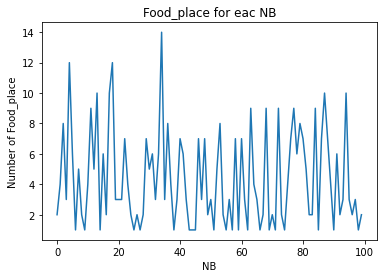

In [367]:
plt.plot(NB,z)
plt.title('Food_place for eac NB') # add a title to the histogram
plt.ylabel('Number of Food_place') # add y-label
plt.xlabel('NB') # add x-label

# Discussion

Unfortunatelly, this analysis does not give any information on where to build a new resturant in general. However It is possible to have information where to build a resturant if someone wants to avoid competition! According to this analysis a good palce to build resturants are where the score index is between 1-3.
## Future develpoment
Additional analysis have to be performed to answer better this question. 
* One can think also to cluster the NB, 
* to see if a specific type of resturant is already present. Because of course wehre more resturans are present it measn there is more people or attraction, therefore build a unique resturant there cans still be a good choise.
* create a ML algorithm that take into account also the other venues as airport, arena etc and create other projection.